In [ ]:
#Web Scrapping

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_English_districts_by_population")

In [47]:
dfWeb=None

for current_df in dfs:
    if current_df.columns.tolist() == ['Rank', 'District', 'Population', 'Type', 'Ceremonial county','Region']:
        dfWeb = current_df
        break

In [48]:
display(dfWeb)

Rank         District  Population                                Type  \
0       1       Birmingham     1141816   Metropolitan borough, City (1889)   
1       2            Leeds      793139   Metropolitan borough, City (1893)   
2       3        Sheffield      584853   Metropolitan borough, City (1893)   
3       4         Cornwall      569578                   Unitary authority   
4       5       Manchester      552858   Metropolitan borough, City (1853)   
..    ...              ...         ...                                 ...   
309   310             Eden       53253           Non-metropolitan district   
310   311           Melton       51209  Non-metropolitan district, Borough   
311   312          Rutland       39927                   Unitary authority   
312   313   City of London        9721              sui generis, City (TI)   
313   314  Isles of Scilly        2224                         sui generis   

      Ceremonial county                    Region  
0         West Midlands             West Midlands  
1        West Yorkshire  Yorkshire and the Humber  
2       South Yorkshire  Yorkshire and the Humber  
3              Cornwall                South West  
4    Greater Manchester                North West  
..                  ...                       ...  
309             Cumbria                North West  
310      Leicestershire             East Midlands  
311             Rutland             East Midlands  
312      City of London                    London  
313            Cornwall                South West  

[314 rows x 6 columns]

In [49]:
dfWeb2=pd.DataFrame()
dfWeb2['local_authority_district']=dfWeb.District
dfWeb2['local_authority_district_population']=dfWeb.Population
dfWeb2

local_authority_district  local_authority_district_population
0                 Birmingham                              1141816
1                      Leeds                               793139
2                  Sheffield                               584853
3                   Cornwall                               569578
4                 Manchester                               552858
..                       ...                                  ...
309                     Eden                                53253
310                   Melton                                51209
311                  Rutland                                39927
312           City of London                                 9721
313          Isles of Scilly                                 2224

[314 rows x 2 columns]

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
#Merging Dataframes (to add new feature: local_authority_district_population)
df = pd.read_csv("new_df.csv")
df= pd.merge(df,dfWeb2)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NameError: name 'dfWeb2' is not defined

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174446 entries, 0 to 174445
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               174446 non-null  object 
 1   accident_year                                174446 non-null  int64  
 2   accident_reference                           174446 non-null  object 
 3   location_easting_osgr                        174446 non-null  float64
 4   location_northing_osgr                       174446 non-null  float64
 5   longitude                                    174446 non-null  float64
 6   latitude                                     174446 non-null  float64
 7   police_force                                 174446 non-null  object 
 8   accident_severity                            174446 non-null  int64  
 9   number_of_vehicles                           174446 non-nul

In [32]:
df = pd.read_excel("georef-united-kingdom-local-authority-district2.xls", header=0)
o=df['Official Name Local authority district'].unique()
y=df['Official Name Region'].unique()
x=df['Official Name County/Unitary district'].unique()
#print(o)
print(len(o))
print(len(y))
print(len(x))
# print(o[407])
# o
df

379
12
216


Geo Point  \
0       51.9591036348, -0.1925185101   
1       51.710379369, 0.768584603274   
2      50.7223009457, -3.51083767703   
3     51.7669206509, -0.194118408017   
4       51.7088865574, 0.14873518694   
..                               ...   
374  52.9733072749, -0.0377615823488   
375    52.9125495667, -1.46834672441   
376    52.5011357822, -1.47587159781   
377     54.962735313, -1.44445599987   
378    55.9865111417, -4.51669125546   

                                             Geo Shape  Year  \
0    {"coordinates": [[[-0.16220526836591, 51.92033...  2020   
1    {"coordinates": [[[[0.593338760082194, 51.7554...  2020   
2    {"coordinates": [[[[-3.460874009333644, 50.695...  2020   
3    {"coordinates": [[[-0.163517920234838, 51.6881...  2020   
4    {"coordinates": [[[0.021792768117238, 51.62883...  2020   
..                                                 ...   ...   
374  {"coordinates": [[[[-0.246714073639072, 52.928...  2020   
375  {"coordinates": [[[-1.54407330622839, 52.92418...  2020   
376  {"coordinates": [[[-1.460003509967938, 52.5515...  2020   
377  {"coordinates": [[[-1.511204240122573, 54.9316...  2020   
378  {"coordinates": [[[-4.60963269632117, 55.94656...  2020   

    Official Code Country Official Name Country Official Code Region  \
0               E92000001               England            E12000006   
1               E92000001               England            E12000006   
2               E92000001               England            E12000009   
3               E92000001               England            E12000006   
4               E92000001               England            E12000006   
..                    ...                   ...                  ...   
374             E92000001               England            E12000004   
375             E92000001               England            E12000004   
376             E92000001               England            E12000005   
377             E92000001               England            E12000001   
378             S92000003              Scotland            S92000003   

    Official Name Region Official Code County/Unitary district  \
0        East of England                             E10000015   
1        East of England                             E10000012   
2             South West                             E10000008   
3        East of England                             E10000015   
4        East of England                             E10000012   
..                   ...                                   ...   
374        East Midlands                             E10000019   
375        East Midlands                             E06000015   
376        West Midlands                             E10000031   
377           North East                             E08000023   
378             Scotland                             S12000039   

    Official Name County/Unitary district  \
0                           Hertfordshire   
1                                   Essex   
2                                   Devon   
3                           Hertfordshire   
4                                   Essex   
..                                    ...   
374                          Lincolnshire   
375                                 Derby   
376                          Warwickshire   
377                        South Tyneside   
378                   West Dunbartonshire   

    Official Code Local authority district  \
0                                E07000099   
1                                E07000074   
2                                E07000041   
3                                E07000241   
4                                E07000072   
..                                     ...   
374                              E07000136   
375                              E06000015   
376                              E07000219   
377                              E08000023   
378                              S12000039   

    Official Name Local a

In [36]:
df2 = pd.read_csv("new_df.csv")
o=df2.local_authority_district.unique()
y=df2.local_authority_ons_district.unique()
x=df2.local_authority_highway.unique()
# #print(o)
print(len(o))
print(len(y))
print(len(x))
# # print(o[407])
# # o
df

408
381
208


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Geo Point  \
0       51.9591036348, -0.1925185101   
1       51.710379369, 0.768584603274   
2      50.7223009457, -3.51083767703   
3     51.7669206509, -0.194118408017   
4       51.7088865574, 0.14873518694   
..                               ...   
374  52.9733072749, -0.0377615823488   
375    52.9125495667, -1.46834672441   
376    52.5011357822, -1.47587159781   
377     54.962735313, -1.44445599987   
378    55.9865111417, -4.51669125546   

                                             Geo Shape  Year  \
0    {"coordinates": [[[-0.16220526836591, 51.92033...  2020   
1    {"coordinates": [[[[0.593338760082194, 51.7554...  2020   
2    {"coordinates": [[[[-3.460874009333644, 50.695...  2020   
3    {"coordinates": [[[-0.163517920234838, 51.6881...  2020   
4    {"coordinates": [[[0.021792768117238, 51.62883...  2020   
..                                                 ...   ...   
374  {"coordinates": [[[[-0.246714073639072, 52.928...  2020   
375  {"coordinates": [[[-1.54407330622839, 52.92418...  2020   
376  {"coordinates": [[[-1.460003509967938, 52.5515...  2020   
377  {"coordinates": [[[-1.511204240122573, 54.9316...  2020   
378  {"coordinates": [[[-4.60963269632117, 55.94656...  2020   

    Official Code Country Official Name Country Official Code Region  \
0               E92000001               England            E12000006   
1               E92000001               England            E12000006   
2               E92000001               England            E12000009   
3               E92000001               England            E12000006   
4               E92000001               England            E12000006   
..                    ...                   ...                  ...   
374             E92000001               England            E12000004   
375             E92000001               England            E12000004   
376             E92000001               England            E12000005   
377             E92000001               England            E12000001   
378             S92000003              Scotland            S92000003   

    Official Name Region Official Code County/Unitary district  \
0        East of England                             E10000015   
1        East of England                             E10000012   
2             South West                             E10000008   
3        East of England                             E10000015   
4        East of England                             E10000012   
..                   ...                                   ...   
374        East Midlands                             E10000019   
375        East Midlands                             E06000015   
376        West Midlands                             E10000031   
377           North East                             E08000023   
378             Scotland                             S12000039   

    Official Name County/Unitary district  \
0                           Hertfordshire   
1                                   Essex   
2                                   Devon   
3                           Hertfordshire   
4                                   Essex   
..                                    ...   
374                          Lincolnshire   
375                                 Derby   
376                          Warwickshire   
377                        South Tyneside   
378                   West Dunbartonshire   

    Official Code Local authority district  \
0                                E07000099   
1                                E07000074   
2                                E07000041   
3                                E07000241   
4                                E07000072   
..                                     ...   
374                              E07000136   
375                              E06000015   
376                              E07000219   
377                              E08000023   
378                              S12000039   

    Official Name Local a

In [52]:
df[['local_authority_district', 'local_authority_district_population']]

local_authority_district  local_authority_district_population
0                       Enfield                               333794
1                       Enfield                               333794
2                       Enfield                               333794
3                       Enfield                               333794
4                       Enfield                               333794
...                         ...                                  ...
174441                  Swindon                               222193
174442                  Swindon                               222193
174443                  Swindon                               222193
174444                  Swindon                               222193
174445                  Swindon                               222193

[174446 rows x 2 columns]

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Question 1: how does the district population affect the frequency of accidents

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

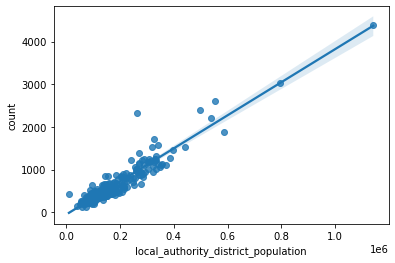

In [53]:
#Visualization 1(A)
x=df3.local_authority_district_population.value_counts()
sns.regplot(x.index, x)
plt.xlabel("local_authority_district_population")
plt.ylabel("count")

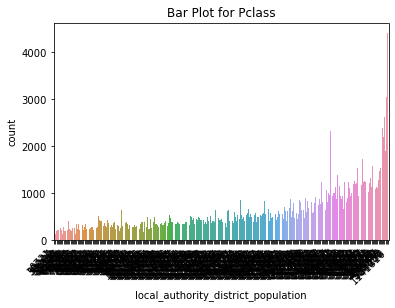

In [57]:
#Visualization 1(B)
y=sns.countplot(x='local_authority_district_population',data=df)
plt.title('Bar Plot for Pclass')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [58]:
#x axis values -> values (population increases as going right)
y.get_xticklabels()

[Text(0, 0, '9721'),
 Text(1, 0, '39927'),
 Text(2, 0, '51209'),
 Text(3, 0, '53253'),
 Text(4, 0, '53730'),
 Text(5, 0, '55380'),
 Text(6, 0, '55796'),
 Text(7, 0, '57015'),
 Text(8, 0, '57142'),
 Text(9, 0, '60888'),
 Text(10, 0, '64301'),
 Text(11, 0, '64926'),
 Text(12, 0, '65264'),
 Text(13, 0, '67049'),
 Text(14, 0, '68183'),
 Text(15, 0, '68267'),
 Text(16, 0, '70173'),
 Text(17, 0, '71482'),
 Text(18, 0, '72218'),
 Text(19, 0, '72325'),
 Text(20, 0, '76696'),
 Text(21, 0, '77021'),
 Text(22, 0, '78698'),
 Text(23, 0, '79707'),
 Text(24, 0, '80562'),
 Text(25, 0, '80627'),
 Text(26, 0, '80780'),
 Text(27, 0, '81043'),
 Text(28, 0, '82311'),
 Text(29, 0, '84838'),
 Text(30, 0, '85261'),
 Text(31, 0, '85950'),
 Text(32, 0, '86791'),
 Text(33, 0, '87004'),
 Text(34, 0, '87067'),
 Text(35, 0, '87245'),
 Text(36, 0, '87368'),
 Text(37, 0, '87845'),
 Text(38, 0, '88129'),
 Text(39, 0, '88920'),
 Text(40, 0, '89305'),
 Text(41, 0, '89424'),
 Text(42, 0, '89840'),
 Text(43, 0, '89862'),

In [ ]:
#Answer 1: as districts' population increases, accident frequency increases

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------

In [59]:
#Writing new dataframe file to csv
df.to_csv("new_df_milestone2.csv", index=False)